# Project 6: Image Classification with Deep Learning


## Goals

With my available datasets I want to train a model to accurately identify whether an image is a cat or a dog given cat and dog training data
This is a superviseddata problem


In [1]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
url3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'
url4 = 'https://th.bing.com/th/id/OIP.gf4OjfhgyqE87NR4bCn-zwHaEf?rs=1&pid=ImgDetMain'

## Imports


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import requests
import io
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import get_file

## Prepare data for splitting


In [3]:
X = pd.read_pickle(url)
# Encode labels: 0 for cat, 1 for dog
y = np.array(pd.read_pickle(url2))

In [4]:
# Confirm data shapes

print(f"X shape: {X.shape}")

print(f"y shape: {y.shape}")

X shape: (24946, 100, 100, 1)
y shape: (24946,)


In [5]:
# Normalize pixel values
X = X / 255.0

## Take a sample of the data


In [6]:
# Calculate the sample size
sample_size = int(0.6 * len(X))

# Generate random indices
random_indices = np.random.choice(len(X), size=sample_size, replace=False)

# Use the random indices to select samples
X = X[random_indices]
y = y[random_indices]

## Test Splitting


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Definition


In [ ]:
# Define model
input_shape = X.shape[1:]
inputs = Input(shape=input_shape)

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Data augmentation


In [13]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

In [14]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.00001)

## Train the model


In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=96),
    epochs=20,
    validation_data=(X_test, y_test),   
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 193ms/step - accuracy: 0.4953 - loss: 0.6916 - val_accuracy: 0.4947 - val_loss: 0.6832 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.5121 - loss: 0.6782 - val_accuracy: 0.4947 - val_loss: 0.6763 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.5008 - loss: 0.6610 - val_accuracy: 0.4947 - val_loss: 0.6376 - learning_rate: 0.0010
Epoch 4/10
130/188 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.5060 - loss: 0.6455

## Evaluate the model


In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8759 - loss: 0.2868
Test accuracy: 0.87


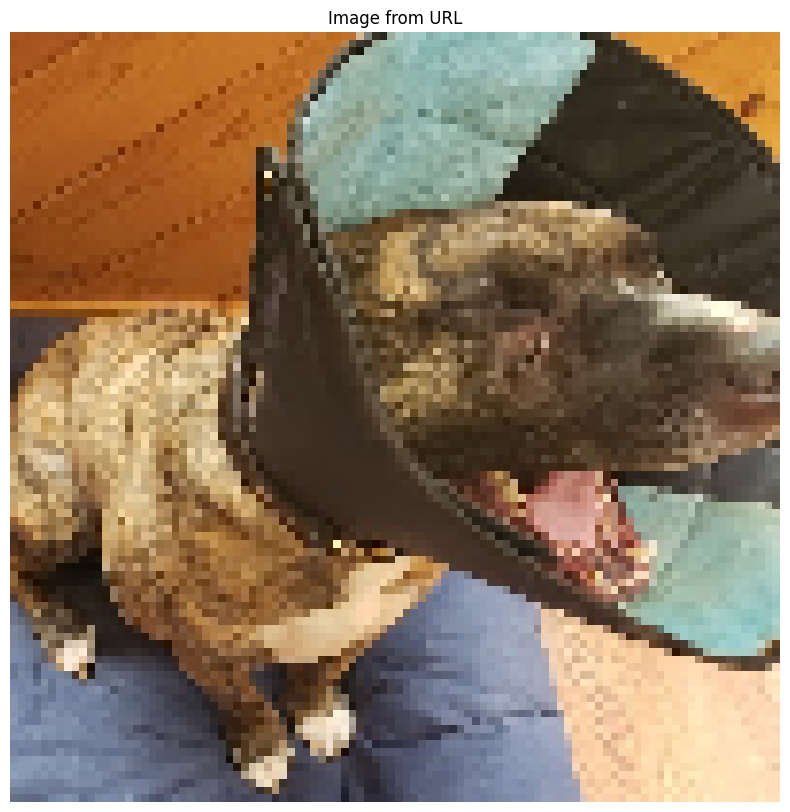

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: [[0.43557438]]
The image is likely a cat


In [ ]:
def show_image_from_url(url):
    img = image.load_img(get_file('temp_image', url), target_size=(X.shape[1], X.shape[2]))
    # Convert the image to a numpy array and normalize
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title("Image from URL")
    plt.axis('off')
    plt.show()

# Use the function
show_image_from_url(url3)

# Load and preprocess the image from url3
img = image.load_img(get_file('temp_image', url3), target_size=(X.shape[1], X.shape[2]))

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img) / 255.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Convert to grayscale if necessary
if img_array.shape[-1] == 3:
    img_array = tf.image.rgb_to_grayscale(img_array)

# Make prediction
prediction = model.predict(img_array)

# Print the prediction
print(f"Prediction: {prediction}")

# Interpret the prediction (assuming 0 is cat and 1 is dog)
if prediction[0][0] < 0.5:
    print("The image is likely a cat")
else:
    print("The image is likely a dog")


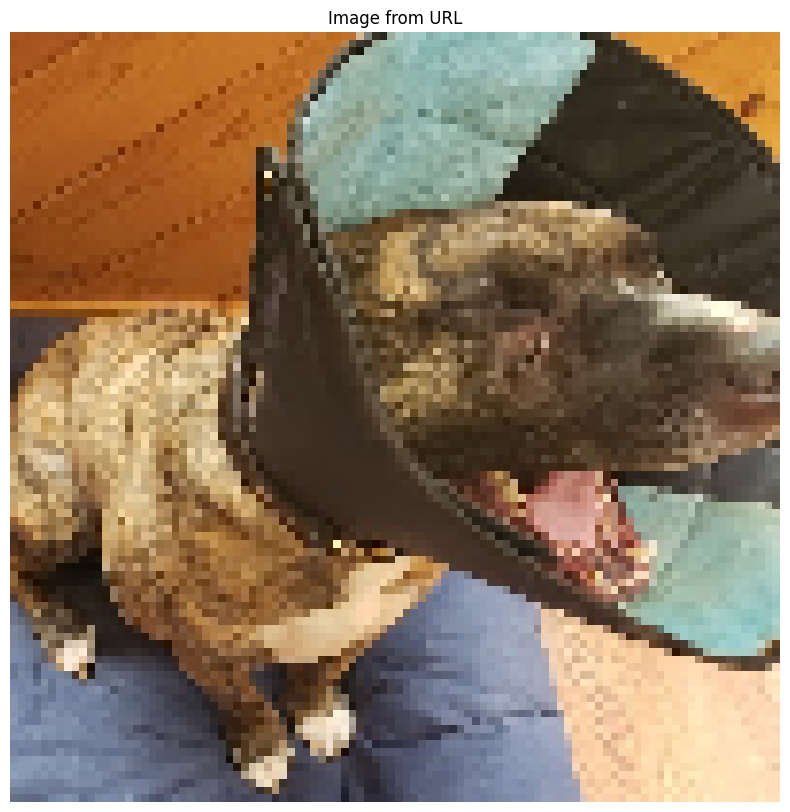

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: [[0.43557438]]
The image is likely a cat


In [ ]:

# Use the function
show_image_from_url(url4)

# Load and preprocess the image from url4
img = image.load_img(get_file('temp_image', url4), target_size=(X.shape[1], X.shape[2]))

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img) / 255.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Convert to grayscale if necessary
if img_array.shape[-1] == 3:
    img_array = tf.image.rgb_to_grayscale(img_array)

# Make prediction
prediction = model.predict(img_array)

# Print the prediction
print(f"Prediction: {prediction}")

# Interpret the prediction (assuming 0 is cat and 1 is dog)
if prediction[0][0] < 0.5:
    print("The image is likely a cat")
else:
    print("The image is likely a dog")


## Model Accuracy


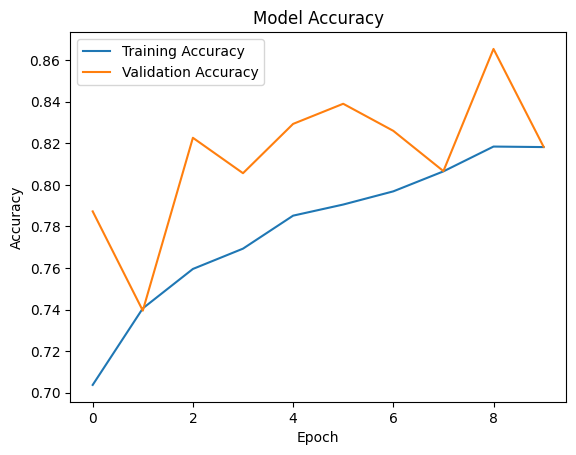

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot training and validation loss


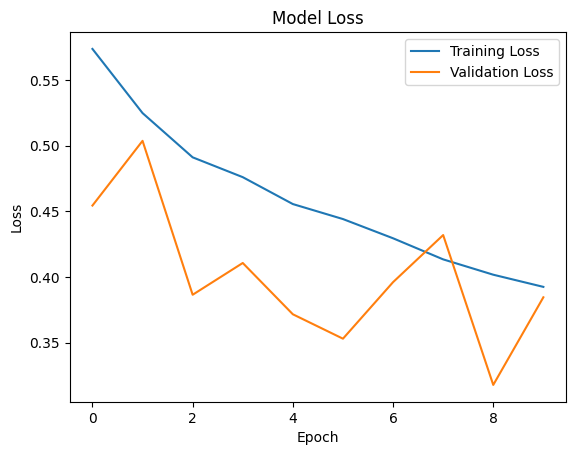

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()